# Project: ANZ synthesised transaction Dataset
## by Imene KOLLI

<a id='intro'></a>
## Introduction

> This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.
The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ANZ synthesised transaction dataset.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.shape

(12043, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

### 1. Data cleaning

In [5]:
# checking the unique values in currency
df.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

currency column should be dropped.

In [6]:
df.drop(['currency'], axis = 1 , inplace = True)

In [7]:
# let's check if we have NaNs in our dataset
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [8]:
# because there are so many NaNs in these two columns, I am going to drop them
df.drop(['bpay_biller_code', 'merchant_code'], axis = 1 , inplace = True)

In [9]:
# let's count the dupliates in the dataset
df.duplicated().sum()

0

In [10]:
# it looks like the NaNs in the dataset are all on commun rows.
df[df.card_present_flag.isnull()][['merchant_id', 'merchant_state', 'merchant_suburb', 'merchant_long_lat']].isnull().sum()

merchant_id          4326
merchant_state       4326
merchant_suburb      4326
merchant_long_lat    4326
dtype: int64

In [11]:
# these are the unique values in the status column.
df['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [12]:
# all the transactions happened in Australia.
df['country'].value_counts()

Australia    12043
Name: country, dtype: int64

In [13]:
# then I am dropping the country column 
df.drop(['country'], axis = 1 , inplace = True)

In [14]:
# the unique movement types 
df.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [15]:
# I am going to change the dtype of date column and extraction column to datetime.
df['date'] = pd.to_datetime(df['date'])
df['extraction'] = pd.to_datetime(df['extraction'])

In [16]:
# adding three columns: year, month, and day of the transaction to make the segmentation by date easy.
df['day']= df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

In [17]:
# now let's check the unique values of our new columns
df.year.value_counts()

2018    12043
Name: year, dtype: int64

In [18]:
# because all the transactions are from 2018, I will drop the year columns
df.drop(['year'], axis = 1 , inplace = True)

In [19]:
# it looks like transactions happened only in August, September, and October
df.month.value_counts()

October      4087
September    4013
August       3943
Name: month, dtype: int64

In [20]:
# unique values of txn_description (mode of transaction)
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [21]:
# finally let's check the distribution of the dataset by gender
df.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [22]:
# this is a quick summary of our categorical variables showing the number of unique values in each
# column with the most frequent value in it and its frequency.
df.describe(exclude = [np.number], datetime_is_numeric=True).loc[['unique','top' ,'freq']]

,status,account,long_lat,txn_description,merchant_id,first_name,date,gender,merchant_suburb,merchant_state,extraction,transaction_id,customer_id,merchant_long_lat,movement,day,month
unique,2,100,100,6,5725,80,NaN,2,1609,8,NaN,12043,100,2703,2,7,3
top,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,NaN,M,Melbourne,NSW,NaN,cfcd6e81528b451f8b45fce7b760e5d2,CUS-2487424745,151.21 -33.87,debit,Friday,October
freq,7717,578,578,3934,14,746,NaN,6285,255,2169,NaN,1,578,145,11160,2073,4087


- transaction_id has 12043 unique values. it won't be significant in my analysis so I will drop it.
- there is 100 customers in the dataset. However, there are only 80 unique first names. I decided to drop the first name columns because the customer_id is more accurate.
- because each customer has a unique account. I will only keep the customer_id column and drop account column.
- for the location based analysis, I will rely merchat_state. I will drop long_lat, merchant_suburb, and merchant_long_lat.
- there are 5725 merchants. the highest number of transactions by merchant is 14 only, meaning the merchant_id won't significantly have an impact on the amount of the transaction. I will drop for now.

In [23]:
df.drop(['transaction_id', 'account', 'first_name', 'long_lat','merchant_id','merchant_suburb', 'merchant_long_lat'], axis = 1 , inplace = True)

In [24]:
# my final dataset

df.head()

,status,card_present_flag,txn_description,balance,date,gender,age,merchant_state,extraction,amount,customer_id,movement,day,month
0,authorized,1.0,POS,35.39,2018-08-01,F,26,QLD,2018-08-01 01:01:15+00:00,16.25,CUS-2487424745,debit,Wednesday,August
1,authorized,0.0,SALES-POS,21.20,2018-08-01,F,26,NSW,2018-08-01 01:13:45+00:00,14.19,CUS-2487424745,debit,Wednesday,August
2,authorized,1.0,POS,5.71,2018-08-01,M,38,NSW,2018-08-01 01:26:15+00:00,6.42,CUS-2142601169,debit,Wednesday,August
3,authorized,1.0,SALES-POS,2117.22,2018-08-01,F,40,QLD,2018-08-01 01:38:45+00:00,40.90,CUS-1614226872,debit,Wednesday,August
4,authorized,1.0,SALES-POS,17.95,2018-08-01,F,26,QLD,2018-08-01 01:51:15+00:00,3.25,CUS-2487424745,debit,Wednesday,August


## Univariate analysis

First, a univariate analysis for my categorical variables.

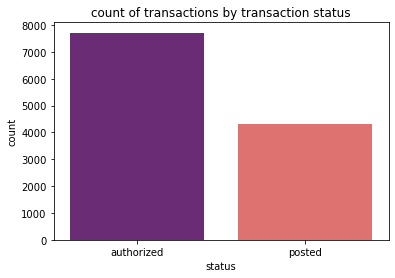

In [25]:
# there are more authorized transactions than posted

sns.countplot(x = 'status', data = df, palette = 'magma')
plt.title('count of transactions by transaction status');

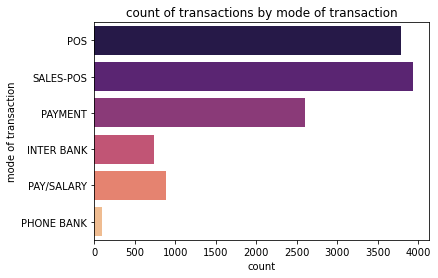

In [26]:
# POS and SALES-POS are the most used modes of transaction

sns.countplot(y = 'txn_description', data = df, palette = 'magma')
plt.title('count of transactions by mode of transaction')
plt.ylabel('mode of transaction');

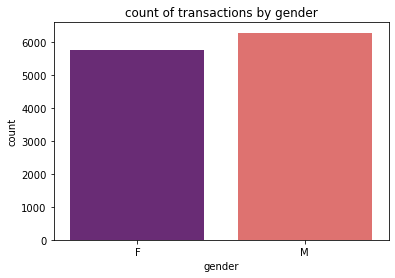

In [27]:
# there are more males than females

sns.countplot(x = 'gender', data = df, palette = 'magma')
plt.title('count of transactions by gender');

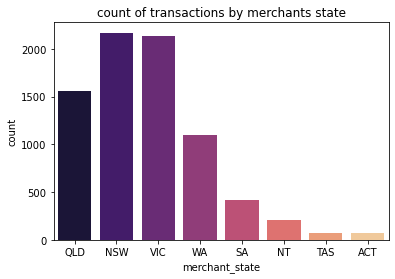

In [28]:
# NSW and VIC are the states with the most transactions

sns.countplot(x = 'merchant_state', data = df, palette = 'magma')
plt.title('count of transactions by merchants state');

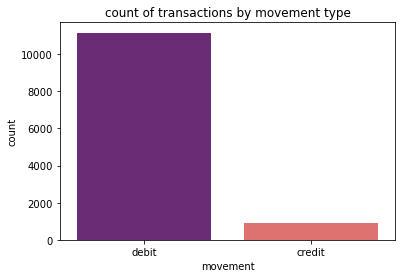

In [29]:
# there are much more debit transactions than credit ones.

sns.countplot(x = 'movement', data = df, palette = 'magma')
plt.title('count of transactions by movement type');

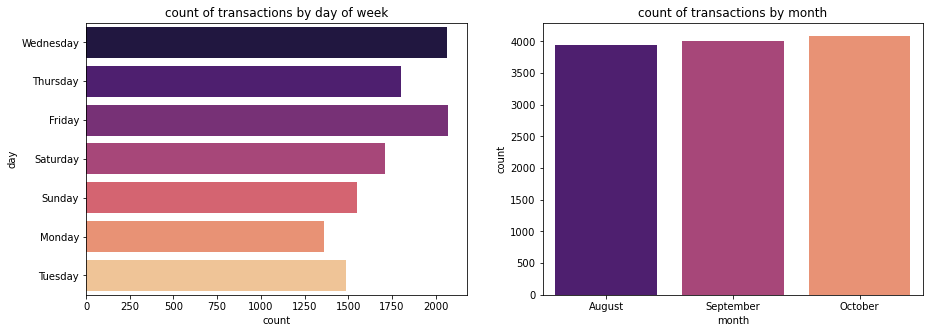

In [30]:
plt.figure(figsize=[15, 5])

# the left plot
plt.subplot(1,2,1)
sns.countplot(y = 'day', data = df, palette = 'magma')
plt.title('count of transactions by day of week')

# the right plot
plt.subplot(1,2,2)
sns.countplot(x = 'month', data = df, palette = 'magma')
plt.title('count of transactions by month');

- Wednesday and Friday are the days with the most number of transactions.
- Monday scored the lowest number of transactions
- the difference in the number of transactions between the months is not significants

Next, an analysis for the numeric variables.

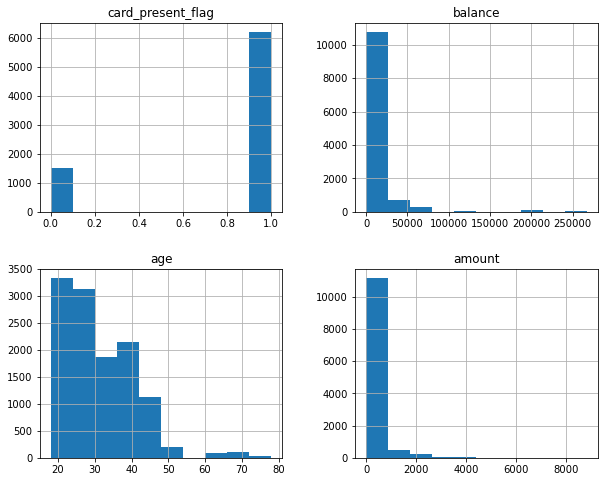

In [31]:
# these are histograms of my numeric variables.
df.hist(figsize=(10,8));

In [32]:
df.describe(datetime_is_numeric=True , percentiles = [0.75, 0.90, 0.95, 0.99])

,card_present_flag,balance,date,age,amount
count,7717.000000,12043.000000,12043,12043.000000,12043.000000
mean,0.802644,14704.195553,2018-09-15 21:27:39.951812864,30.582330,187.933588
min,0.000000,0.240000,2018-08-01 00:00:00,18.000000,0.100000
50%,1.000000,6432.010000,2018-09-16 00:00:00,28.000000,29.000000
75%,1.000000,12465.945000,2018-10-09 00:00:00,38.000000,53.655000
90%,1.000000,29442.384000,2018-10-22 00:00:00,43.000000,186.000000
95%,1.000000,53362.930000,2018-10-27 00:00:00,46.000000,1158.150000
99%,1.000000,201963.445200,2018-10-31 00:00:00,69.000000,3195.010000
max,1.000000,267128.520000,2018-10-31 00:00:00,78.000000,8835.980000
std,0.398029,31503.722652,NaN,10.046343,592.599934


- There seem to be some outliers in amount, age, and balance columns.

## Transaction amount analysis

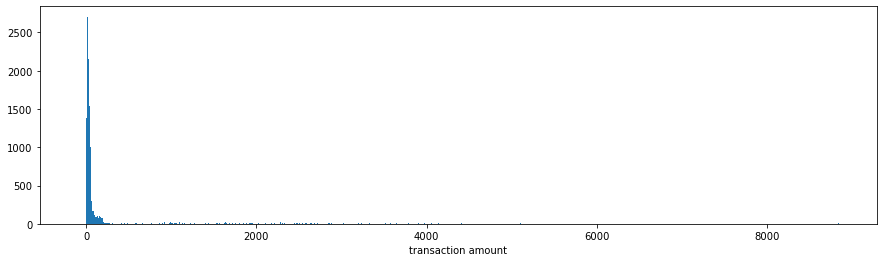

In [33]:
plt.figure(figsize=[15,4])
binsize = 10
bins = np.arange(-100, df['amount'].max()+binsize, binsize)
plt.hist(data = df, x = 'amount', bins = bins)
plt.xlabel('transaction amount');

let's get rid of the outliers by limiting the x axis

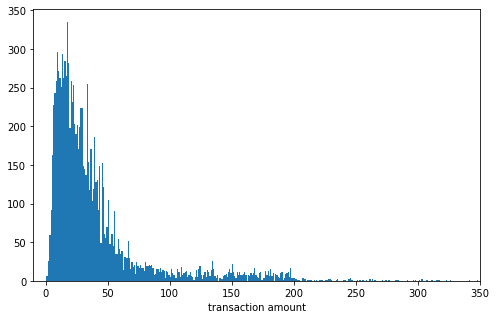

In [34]:
plt.figure(figsize=[8, 5])

bin_edges = np.arange(-10, 350+1,1)
plt.hist(data = df, x = 'amount', bins = bin_edges)
plt.xlim(-10, 350)
plt.xlabel('transaction amount');

the transaction amount looks normally distributed but long-tailed due to outliers. But with the use of axis limits, we are able to see the normal distribution clearly.

### Amount by gender

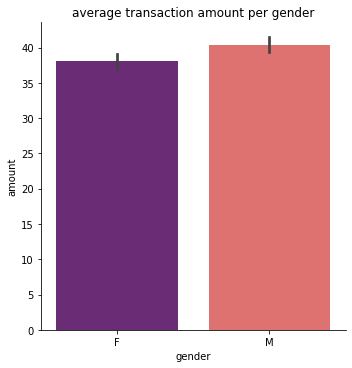

In [35]:
sns.catplot(x="gender", y="amount", kind="bar", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per gender');

this is a barplot showing the average amount of transactions for each gender. with a confidence interval displayed as error bars.

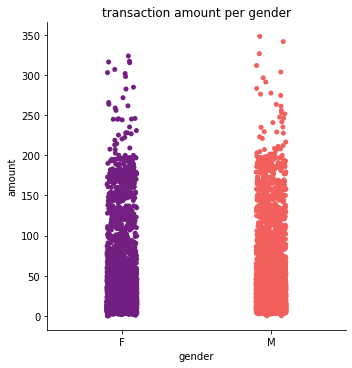

In [36]:
# scatterplot
sns.catplot(x="gender", y = 'amount', data=df.query('amount <= 350'), palette = 'magma')
plt.title('transaction amount per gender');

this is a categorical scatterplot showing the transaction amount for each gender.

- the highest amounts are made by men
- the amount of transactions made by men are higher on average.

### Amount by month

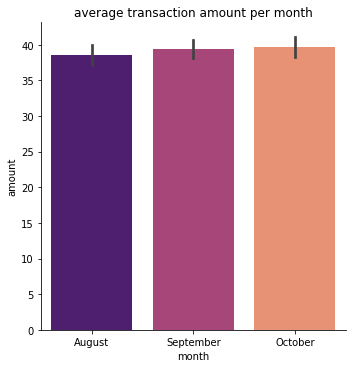

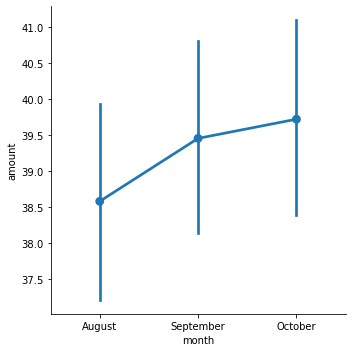

In [37]:
sns.catplot(x="month", y="amount", kind="bar", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per month')
sns.catplot(x="month", y="amount", kind="point", data=df.query('amount <= 350'));

October has higher transaction amounts than Auguest and September.

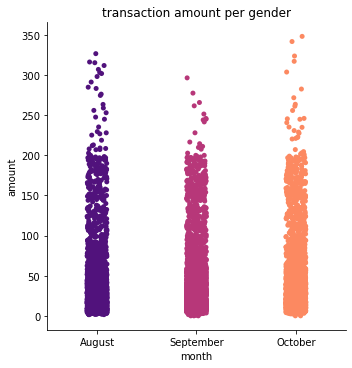

In [38]:
sns.catplot(x="month", y = 'amount', data=df.query('amount <= 350'), palette = 'magma')
plt.title('transaction amount per gender');

outliers in the transaction amount happen in all three months. 

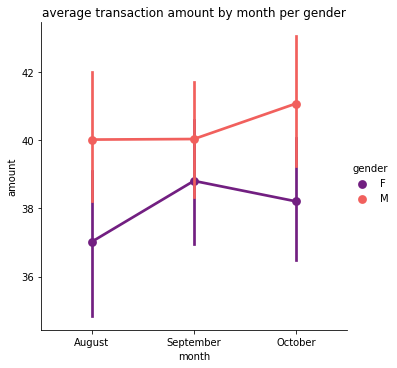

In [39]:
sns.catplot(x="month", y="amount", hue="gender",kind="point", data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by month per gender');

- males have higher transaction amounts.
- October is the month with the highest transaction amounts for both genders.

### Amount by day

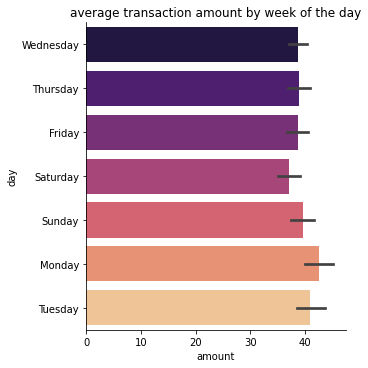

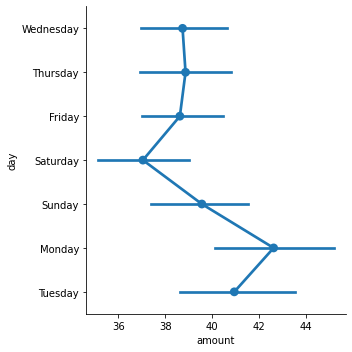

In [40]:
sns.catplot(y="day", x="amount", kind="bar", data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by week of the day')
sns.catplot(y="day", x="amount", kind="point", data=df.query('amount <= 350'));

- the amount of transactions is the lowest on weekend Saturday.
- the transactions with the highest amounts happen mostly on Monday.

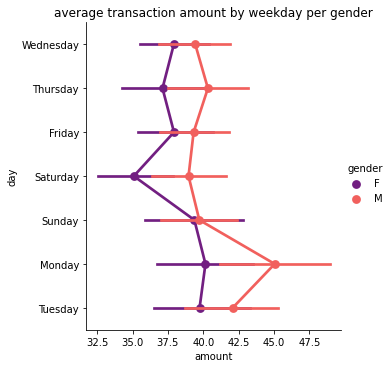

In [41]:
sns.catplot(y="day", x="amount", hue="gender",kind="point", data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by weekday per gender');

only on Sunday do women have almost the same amount of transaction as men.

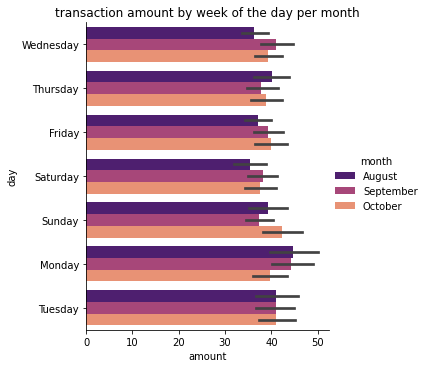

In [42]:
sns.catplot(y="day", x="amount",hue='month', kind="bar", data=df.query('amount <= 350'), palette = 'magma')
plt.title('transaction amount by week of the day per month');

### Amount by location

In [43]:
# min and max amount of transactions in each state
df.groupby('merchant_state')['amount'].agg(['min' , 'max'])

,min,max
merchant_state,,
ACT,4.50,1348.47
NSW,0.10,4233.00
NT,1.71,1285.09
QLD,0.10,7081.09
SA,3.28,909.61
TAS,7.35,133.31
VIC,0.10,3680.71
WA,2.05,1692.56


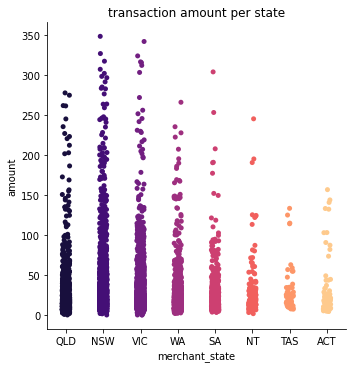

In [44]:
sns.catplot(x="merchant_state", y = 'amount', data=df.query('amount <= 350'), palette = 'magma')
plt.title('transaction amount per state');

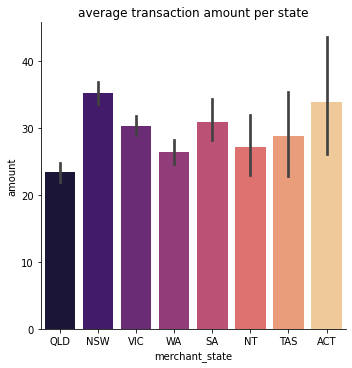

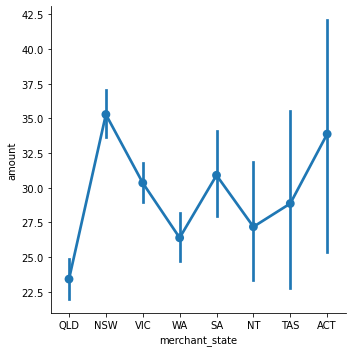

In [45]:
sns.catplot(x="merchant_state", y="amount", kind="bar", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per state')
sns.catplot(x="merchant_state", y="amount", kind="point", data=df.query('amount <= 350'));

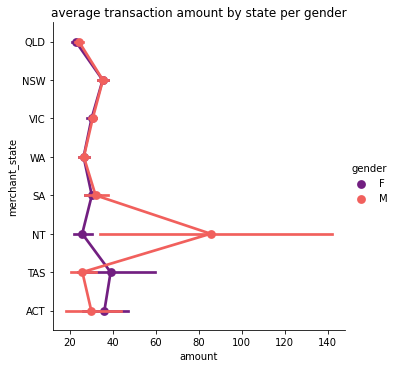

In [46]:
sns.catplot(y="merchant_state", x="amount", hue="gender",kind="point", data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by state per gender');

women's transaction amounts are higher than men in the state of TAS and ACT

### Amount by  Age

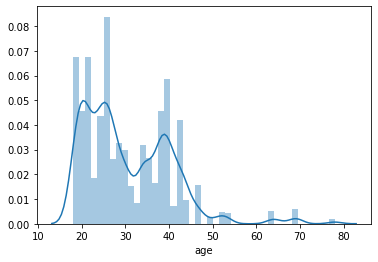

In [47]:
sns.distplot(df['age']);

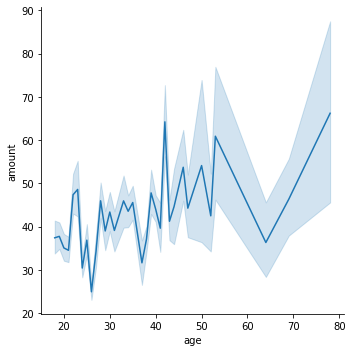

In [48]:
sns.relplot(x='age' , y='amount', kind="line" , data=df.query('amount <= 350'));

the highest amounts of transactions are made by customers of age between 40 and 45.

### Amount by transaction type

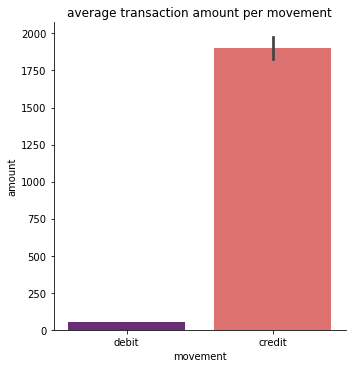

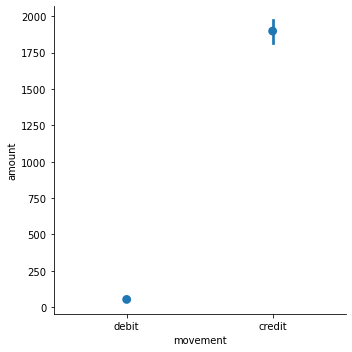

In [49]:
sns.catplot(x="movement", y="amount", kind="bar", data=df , palette = 'magma')
plt.title('average transaction amount per movement')
sns.catplot(x="movement", y="amount", kind="point", data=df, join=False);

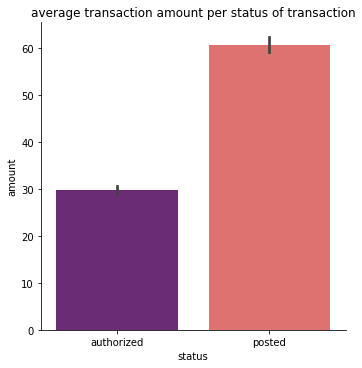

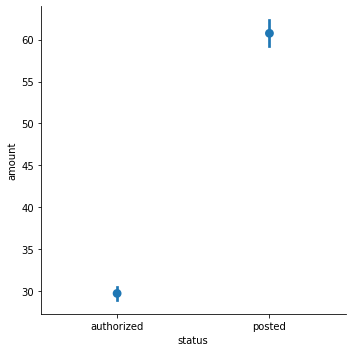

In [66]:
sns.catplot(x="status", y="amount", kind="bar", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per status of transaction')
sns.catplot(x="status", y="amount", kind="point", data=df.query('amount <= 350'), join=False);

- small amount transactions are debit and authorised transactions.
- high amount transactions are credit and posted transactions.

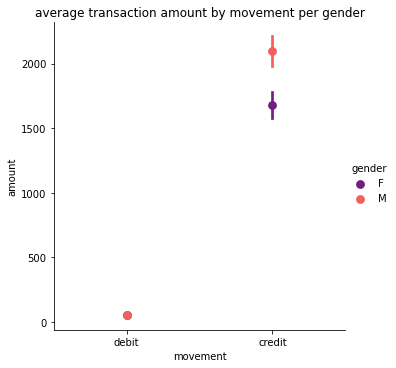

In [51]:
sns.catplot(x="movement", y="amount", hue="gender",kind="point", data=df, palette = 'magma', join=False)
plt.title('average transaction amount by movement per gender');

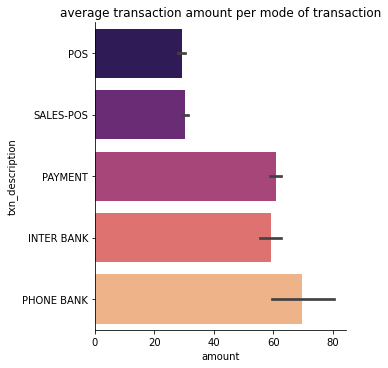

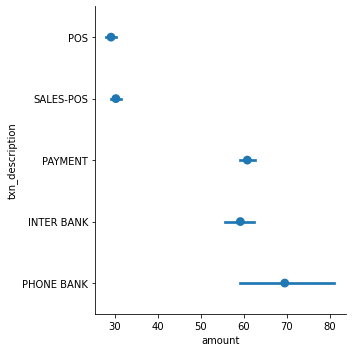

In [52]:
sns.catplot(y="txn_description", x="amount", kind="bar", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per mode of transaction')
sns.catplot(y="txn_description", x="amount", kind="point", data=df.query('amount <= 350'), join=False);

- Phone bank transactions are the ones with the highest amount in transactions.

### Amount and Customers

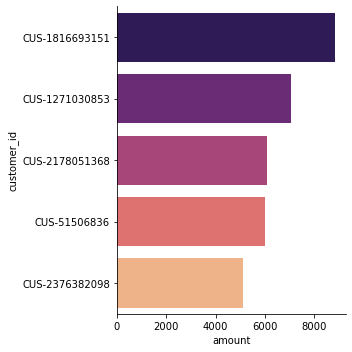

In [53]:
# customers of the 10 highest transaction amounts
df1 = df.loc[df.amount.sort_values(ascending =False)[:10].index]
sns.catplot(y="customer_id", x="amount", kind="bar", data=df1 , palette = 'magma');

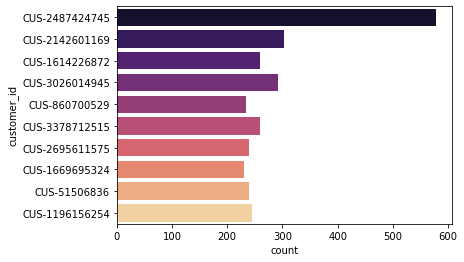

In [54]:
# cutomers with the highest number of transactions
df2 = df.loc[df['customer_id'].isin(df.customer_id.value_counts()[:10].index)]
sns.countplot(y = 'customer_id', data=df2 , palette = 'magma');

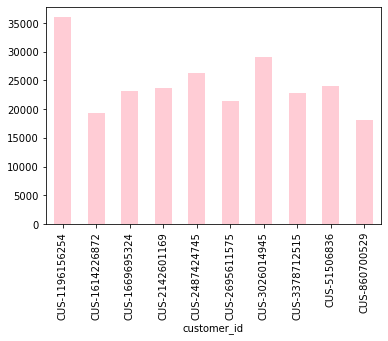

In [55]:
# total transactions amounts for the customers with highest number of transactions
df2.groupby('customer_id')['amount'].sum().plot.bar(color = 'pink', alpha = 0.8);

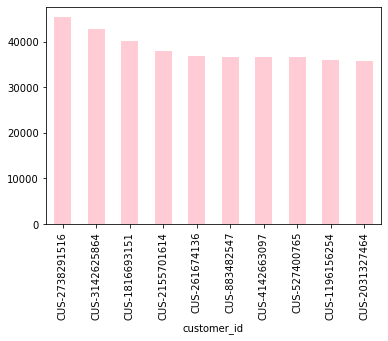

In [56]:
# most spending customers
df.groupby('customer_id')['amount'].sum().sort_values(ascending=False)[:10].plot.bar(color = 'pink', alpha = 0.8);

In [57]:
highest_transactions_customers = df1.customer_id.value_counts().index.tolist()

In [58]:
most_dealing_customers = df2.customer_id.value_counts().index.tolist()

In [59]:
most_spending_customers = df.groupby('customer_id')['amount'].sum().sort_values(ascending=False)[:10].index.tolist()

In [60]:
# no customer belongs to top 10 : most spending customers, highest transations made, and highest number of transactions.
set(highest_transactions_customers).intersection(most_dealing_customers, most_spending_customers)

set()

In [61]:
# this customer did the 4th highest transaction amount and ranked 9th in the customers who made the most transactions.
set(highest_transactions_customers).intersection(most_dealing_customers)

{'CUS-51506836'}

In [62]:
# this customer did the highest transaction amount and is the thirst most spending customer
set(highest_transactions_customers).intersection(most_spending_customers)

{'CUS-1816693151'}

In [63]:
# this customer did more transactions than all others, and is the 9th most spending customer.
set(most_dealing_customers).intersection(most_spending_customers)

{'CUS-1196156254'}

### Amount and Balance

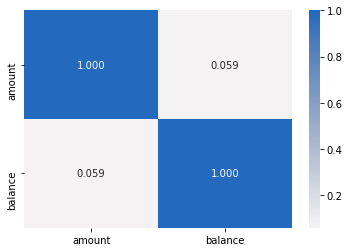

In [64]:
sns.heatmap(df[['amount', 'balance']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

There is no significant relation between the balance and transaction amount.